# Importing Project dependencies

In [3]:
import json
import nltk
import csv
import glob

In [4]:
path1 = r'C:\Users\Kanishk Verma\Desktop\Practicum\DepTag\AirlineRatings'
path2 = r'C:\Users\Kanishk Verma\Desktop\Practicum\DepTag\TripAdvisor'

In [5]:
file1 = glob.glob(path1+r'\*.json')

file2 = glob.glob(path2+r'\*.json')


In [6]:
files = file1+file2

In [7]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
newStop = ['was', 'and', 'the', 'to', 'in', 'of', 'a', 'an', 'is', 'were', 'for', 'with', 'are', 'one', 'our', 'gave', 'have',
           'me', 'an', 'i', 'or', 'had', 'did', 'get', 'made', 'take', 'given', 'told', 'let', 'us', "n't", 'air', 'one', 'two', 'three', 
          'four', 'five', 'thousand', 'cc', 'twenty', 'ten', 'hundred']
stop_words = stop_words+newStop
stop_words.remove('not')

# Loading Files

In [8]:
finInfo = []
for i in range(len(files)):
    for line in open(files[i]):
        info = json.loads(line)
    finInfo.append(info)

In [8]:
labelledWords = []
for i in range(len(finInfo)):
    for j in range(len(finInfo[i])):
        info = finInfo[i][j]
        labels = info['Labels']
        for p in range(len(labels)):
            for k,v in labels[p].items():
                for l in range(len(v)):
                    if (v[l] not in stop_words):
                        lblWrd = v[l].split()
                        for w in lblWrd:
                            labelledWords.append(w)
labelledWords = list(set(labelledWords))

In [8]:
def calculateTTR(airlinename):
    '''
    This function calcuates the Type Token Ratio.
    Input is only airline-name
    '''
    for i in range(len(allInfo)):
        if allInfo[i]['AirlineName'] == airlinename:
            reviews = []
            finInfo = allInfo[i]['Info'][0]
            for j in range(len(finInfo)):
                sents = finInfo[j]['sentence']
                for s in sents:
                    reviews.append(s)
            allTxt = ' '.join(reviews)
            tokens = nltk.word_tokenize(allTxt)
            newTkn = []
            for tkn in tokens:
                if tkn not in stop_words:
                    newTkn.append(tkn)
            
            types = nltk.Counter(newTkn)
            TTR = round((len(types)/ len(newTkn)), 2)
            print(airlinename+" Type/Token Ratio is: "+str(TTR))
            return TTR

# AirlineRatings

In [9]:
file1

['C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\AerLingus_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\AirArabia_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\AirAsia_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\AirCanada_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\AirFrance_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\AirIndia_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\AmericanAirlines_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\DragonAir_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\IndigoAirlines_DepTag.json',
 'C:\\Users\\Kanishk Verma\\Desktop\\Practicum\\DepTag\\AirlineRatings\\Vistara_DepTag.json']

In [10]:
allInfo = []
for i in range(len(file1)):
    dic = {}
    fname = file1[i].split("\\")[-1].split("_")[0]
    dic['AirlineName'] = fname
    n = []
    for line in open(file1[i]):
        info2 = json.loads(line)
    n.append(info2)
    dic['Info'] = n
    allInfo.append(dic)

In [11]:
len(allInfo)

10

In [12]:
airlineNames = []
for i in range(len(allInfo)):
    airlineNames.append(allInfo[i]['AirlineName'])

In [13]:
airlineNames

['AerLingus',
 'AirArabia',
 'AirAsia',
 'AirCanada',
 'AirFrance',
 'AirIndia',
 'AmericanAirlines',
 'DragonAir',
 'IndigoAirlines',
 'Vistara']

## Airline-wise TTR

In [14]:
lingusTTR = calculateTTR('AerLingus')
arabiaTTR= calculateTTR('AirArabia')
asiaTTR= calculateTTR('AirAsia')
canadaTTR= calculateTTR('AirCanada')
franceTTR= calculateTTR('AirFrance')
indiaTTR= calculateTTR('AirIndia')
americanTTR= calculateTTR('AmericanAirlines')
dragonTTR= calculateTTR('DragonAir')
indigoTTR= calculateTTR('IndigoAirlines')
vistaraTTR= calculateTTR('Vistara')

AerLingus Type/Token Ratio is: 0.24
AirArabia Type/Token Ratio is: 0.25
AirAsia Type/Token Ratio is: 0.32
AirCanada Type/Token Ratio is: 0.29
AirFrance Type/Token Ratio is: 0.29
AirIndia Type/Token Ratio is: 0.28
AmericanAirlines Type/Token Ratio is: 0.27
DragonAir Type/Token Ratio is: 0.51
IndigoAirlines Type/Token Ratio is: 0.27
Vistara Type/Token Ratio is: 0.31


In [15]:
TTRs = [lingusTTR,
arabiaTTR,
asiaTTR,
canadaTTR,
franceTTR,
indiaTTR,
americanTTR,
dragonTTR,
indigoTTR,
vistaraTTR]

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(columns=['Airline', 'TTR'])
df['Airline'] = airlineNames
df['TTR'] = TTRs

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set_style("whitegrid")

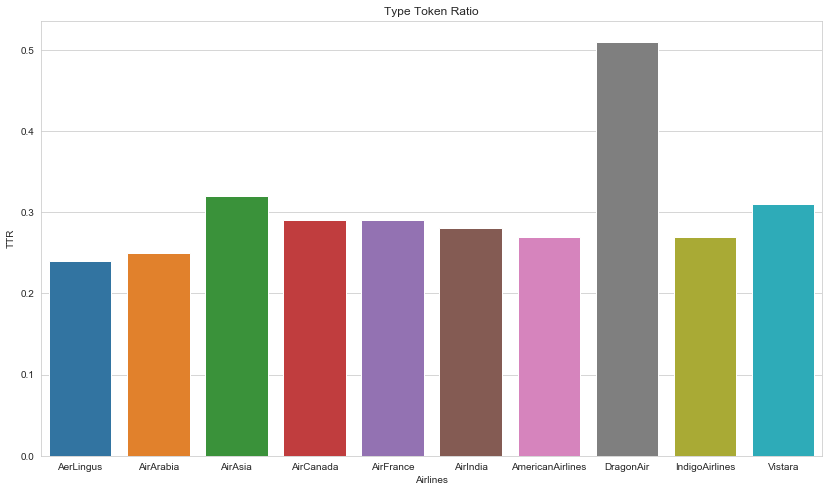

In [20]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['Airline'],y=df['TTR'])
plt.title('Type Token Ratio')
plt.xlabel('Airlines')
plt.ylabel('TTR')
plt.show()

# TripAdvisor

In [21]:
allInfo = []
for i in range(len(file2)):
    dic = {}
    fname = file2[i].split("\\")[-1].split("_")[0]
    dic['AirlineName'] = fname
    n = []
    for line in open(file2[i]):
        info2 = json.loads(line)
    n.append(info2)
    dic['Info'] = n
    allInfo.append(dic)

In [22]:
airlineNames = []
for i in range(len(allInfo)):
    airlineNames.append(allInfo[i]['AirlineName'])

In [23]:
airlineNames

['AirArabia',
 'AirAsia',
 'AirCanada',
 'AirFrance',
 'AirIndia',
 'British',
 'Emirates',
 'UnitedAirlines',
 'VirginAtlantic',
 'VirginAustralia',
 'Vistara']

## Airline-wise TTR

In [24]:
arabiaTTR= calculateTTR('AirArabia')
asiaTTR= calculateTTR('AirAsia')
canadaTTR= calculateTTR('AirCanada')
franceTTR= calculateTTR('AirFrance')
indiaTTR= calculateTTR('AirIndia')
britishTTR= calculateTTR('British')
emiratesTTR= calculateTTR('Emirates')
unitedTTR= calculateTTR('UnitedAirlines')
atlanticTTR= calculateTTR('VirginAtlantic')
ausTTR= calculateTTR('VirginAustralia')
vistaraTTR= calculateTTR('Vistara')

AirArabia Type/Token Ratio is: 0.42
AirAsia Type/Token Ratio is: 0.44
AirCanada Type/Token Ratio is: 0.45
AirFrance Type/Token Ratio is: 0.44
AirIndia Type/Token Ratio is: 0.7
British Type/Token Ratio is: 0.42
Emirates Type/Token Ratio is: 0.29
UnitedAirlines Type/Token Ratio is: 0.44
VirginAtlantic Type/Token Ratio is: 0.44
VirginAustralia Type/Token Ratio is: 0.46
Vistara Type/Token Ratio is: 0.45


In [25]:
TTRs= [arabiaTTR,
asiaTTR,
canadaTTR,
franceTTR,
indiaTTR,
britishTTR,
emiratesTTR,
unitedTTR,
atlanticTTR,
ausTTR,
vistaraTTR]

In [26]:
df = pd.DataFrame(columns=['Airline', 'TTR'])
df['Airline'] = airlineNames
df['TTR'] = TTRs

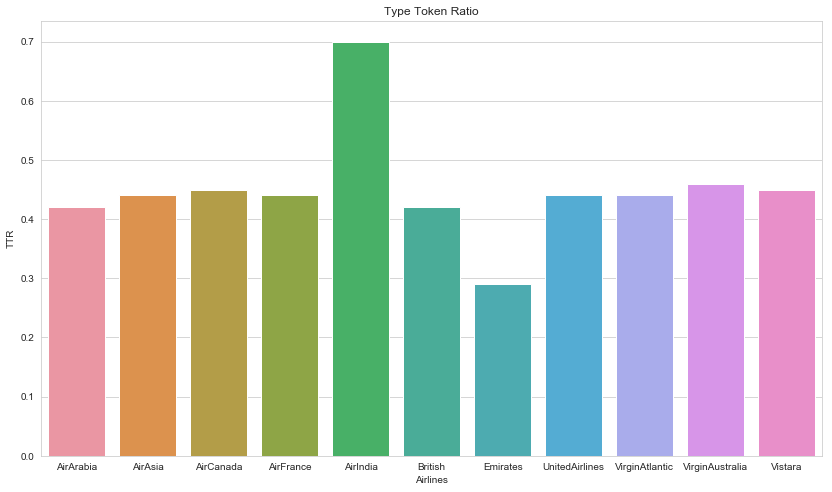

In [27]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['Airline'],y=df['TTR'])
plt.title('Type Token Ratio')
plt.xlabel('Airlines')
plt.ylabel('TTR')
plt.show()

# Between Both Data Source

In [59]:
cmnairlines = ['AirArabia',
               'AirAsia',
               'AirCanada',
               'AirFrance',
               'AirIndia']

In [61]:
# Airline Ratings
n = []
for i in range(len(file1)):
    for a in cmnairlines:
        if a in file1[i]:
            for line in open(file1[i]):
                info = json.loads(line)
            n.append(info)

In [63]:
reviews = []
for i in range(len(n)):
    for j in range(len(n[i])):
        sent = n[i][j]['sentence']
        for s in sent:
            reviews.append(s)
airlineTxt = ' '.join(reviews)

In [64]:
tokens = nltk.word_tokenize(airlineTxt)
newTkn = []
for tkn in tokens:
    if tkn not in stop_words:
        newTkn.append(tkn)
types = nltk.Counter(newTkn)
TTR = round((len(types)/ len(newTkn)), 2)        

In [65]:
TTR

0.15

In [69]:
# TripAdvisor
n = []
for i in range(len(file2)):
     for a in cmnairlines:
        if a in file2[i]:
            for line in open(file2[i]):
                info = json.loads(line)
            n.append(info)

In [70]:
reviews = []
for i in range(len(n)):
    for j in range(len(n[i])):
        sent = n[i][j]['sentence']
        for s in sent:
            reviews.append(s)
tripText = ' '.join(reviews)

In [71]:
tokens = nltk.word_tokenize(tripText)
newTkn = []
for tkn in tokens:
    if tkn not in stop_words:
        newTkn.append(tkn)
types = nltk.Counter(newTkn)
TTR = round((len(types)/ len(newTkn)), 2)    

In [72]:
TTR

0.27

# Zipf's Law

In [28]:
import re
from operator import itemgetter  
from scipy import special
import numpy as np

In [29]:
len(files)

21

In [30]:
len(finInfo)

21

In [31]:
allreviews = []
for i in range(len(finInfo)):
    for j in range(len(finInfo[i])):
        info = finInfo[i][j]
        sents = info['sentence']
        for s in sents:
            allreviews.append(s)
alltxt = ' '.join(allreviews)

In [32]:
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', alltxt)

In [33]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [34]:
newWords = []
for word in words:
    if word not in stop_words:
        word = lemmatizer.lemmatize(word)
        newWords.append(word)

In [35]:
frequency = {}
for word in newWords:
    count = frequency.get(word,0)
    frequency[word] = count + 1

In [42]:
counts = []
tokens = []
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    if value > 350:
        counts.append(value)
        tokens.append(key)
        rank = np.arange(1, len(counts)+1)
ranks = list(rank)

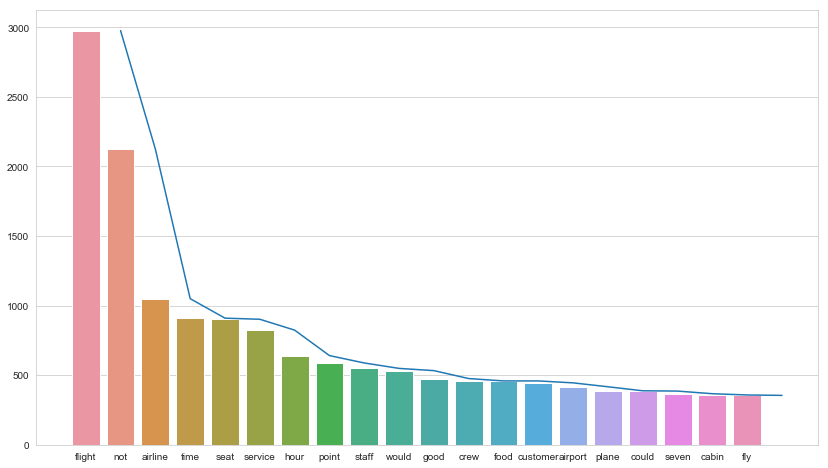

In [43]:
plt.figure(figsize=(14,8))
sns.barplot(tokens, counts)
sns.lineplot(ranks, counts)
plt.show()